<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 전처리


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6])) # 튜플은 리스트와 매우 비슷하다. 한 번 만들어진 튜플은 수정 불가

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data=np.column_stack((fish_length,fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
print(np.ones(5)) # 원하는 갯수만큼 1로 채워진 배열 생성

[1. 1. 1. 1. 1.]


In [8]:
fish_target=np.concatenate((np.ones(35),np.zeros(14))) # 좀 더 나음

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split # 자체적으로 랜덤 시드 지정 가능 => random_state=

In [37]:
a=int(input("시드를 설정해주세요. Please assign seed:"))
train_input, test_input, train_target, test_target=train_test_split(fish_data,fish_target,random_state=a) # data는 input으로, target은 target으로 감
print("시드{0}로 지정되엇습니다. seed was assigned {0}.".format(a))

시드를 설정해주세요. Please assign seed:42
시드42로 지정되엇습니다. seed was assigned 42.


In [13]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [14]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [28]:
print(test_target)#테스트시킬 것들이 잘 섞엿는지
print(train_target)#훈련시킬 것들이 잘 섞였는지

[0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [29]:
print(kn.predict([[25,150]]))

[0.]


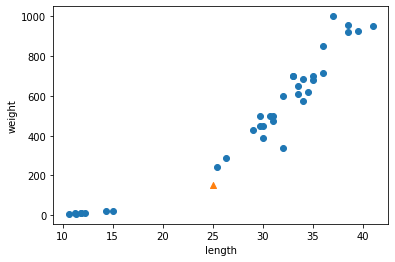

In [30]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
distances,indexes=kn.kneighbors([[25,150]])

Text(0, 0.5, 'weight')

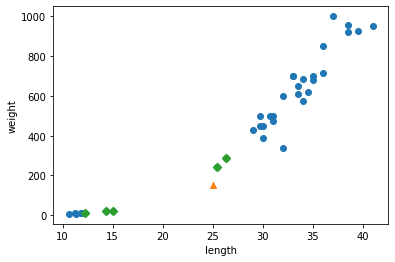

In [34]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [35]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 12.2  12.2]
  [ 26.3 290. ]]]


In [36]:
print(train_target[indexes])

[[1. 0. 0. 0. 1.]]


In [ ]:
#97p 체크포인트